In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from kernels import ClassicalKernel, QuantumKernel
from scratch import SVMFromScratch
from visualization import Visualizer

In [2]:
embedding_size = 2

In [3]:
# dataset = datasets.load_breast_cancer(as_frame=True)
# dataset = datasets.load_iris(as_frame=True)
dataset = datasets.make_classification(
    n_samples=100,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    n_informative=2,
    n_redundant=0,
    random_state=0,
)

In [4]:
if isinstance(dataset, tuple):
    X, y = dataset
elif isinstance(dataset, dict):
    X = dataset["data"]
    y = dataset["target"]
elif isinstance(dataset, pd.DataFrame):
    X = dataset.data
    y = dataset.target
else:
    raise ValueError(f"Unknown dataset type: {type(dataset)}")

In [5]:
# X = StandardScaler().fit_transform(X)
X = MinMaxScaler(feature_range=(0, 1)).fit_transform(X)
# y = MinMaxScaler(feature_range=(-1, 1)).fit_transform(y.reshape(-1, 1)).reshape(-1).astype(int)
print(f"{X.shape = }, {y.shape = }")
print(f"{np.unique(y) = }")

X.shape = (100, 2), y.shape = (100,)
np.unique(y) = array([0, 1])


In [6]:
clas_kernel = ClassicalKernel(
    embedding_dim=embedding_size,
    metric="rbf",
    seed=0
).fit(X, y)
q_kernel = QuantumKernel(
    embedding_dim=embedding_size,
    seed=0,
).fit(X, y)

In [7]:
clas_model = svm.SVC(kernel=clas_kernel.kernel, random_state=0)
qml_model = svm.SVC(kernel=q_kernel.kernel, random_state=0)
scratch_model = SVMFromScratch(kernel=clas_kernel.kernel, max_iter=1_000)
q_scratch_model = SVMFromScratch(kernel=q_kernel.kernel, max_iter=1_000)

models = {
    # "classical": clas_model,
    # "qml": qml_model,
    "scratch": scratch_model,
    "q_scratch": q_scratch_model,
}

scratch accuracy: 93.0000%, fit_time = 0.510880708694458[s]


 31%|███▏      | 1566/5000 [00:01<00:03, 930.17it/s]

KeyboardInterrupt



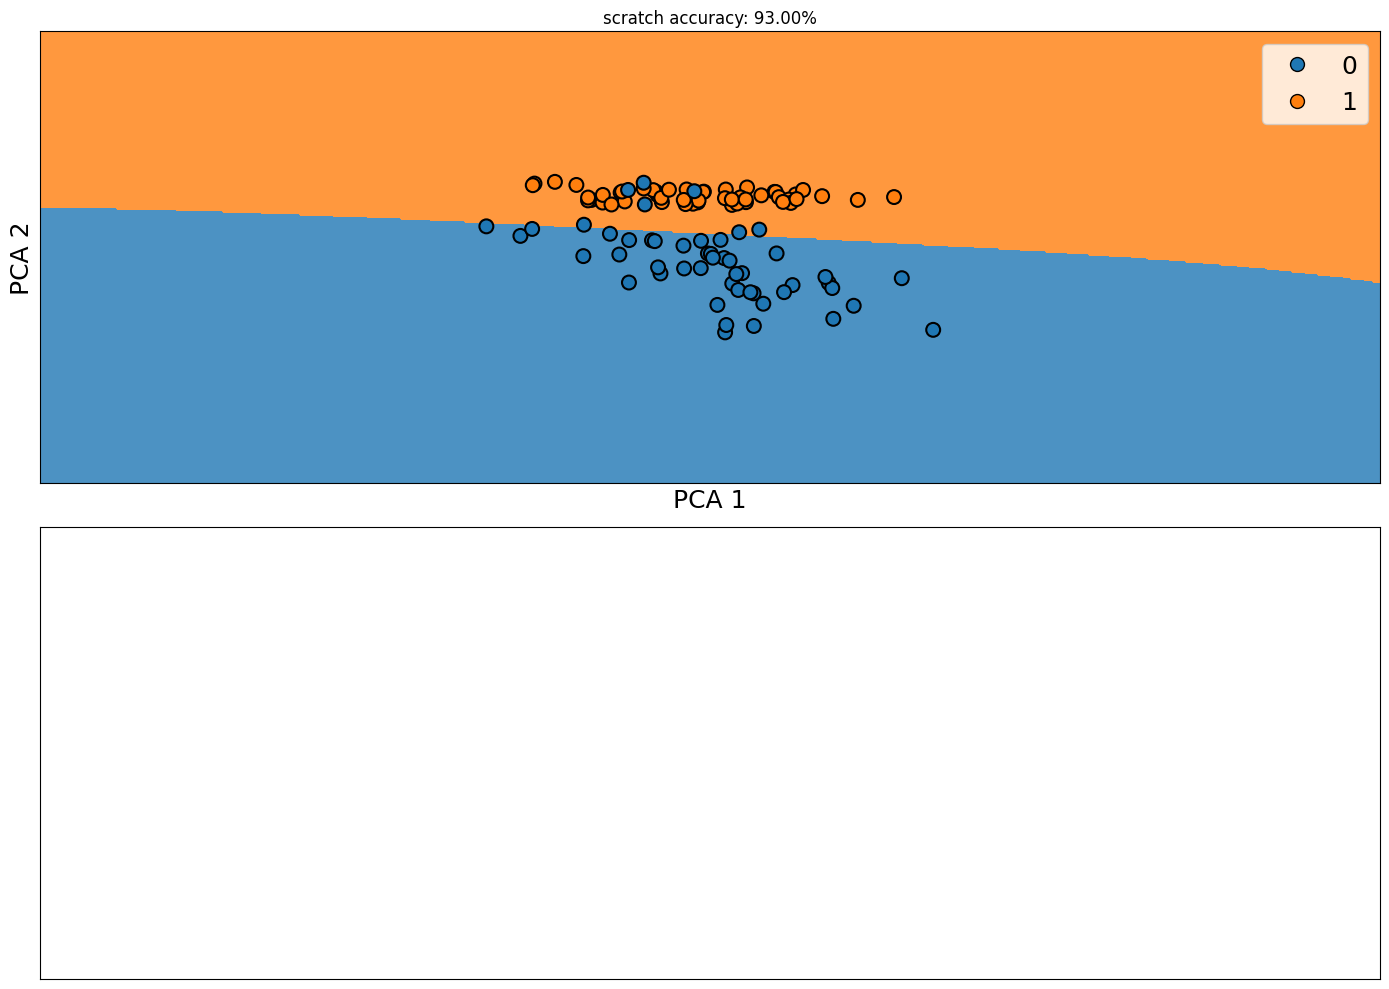

In [8]:
fig, axes = plt.subplots(len(models), 1, tight_layout=True, figsize=(14, 10), sharex="all", sharey="all")
axes = np.ravel(np.asarray([axes]))
for i, (m_name, model) in enumerate(models.items()):
    fit_start_time = time.time()
    model.fit(X, y)
    fit_end_time = time.time()
    fit_time = fit_end_time - fit_start_time
    accuracy = model.score(X, y)
    print(f"{m_name} accuracy: {accuracy * 100 :.4f}%, {fit_time = }[s]")

    fig, ax = Visualizer.plot_2d_decision_boundaries(
        model=model,
        X=X, y=y,
        # reducer=decomposition.PCA(n_components=2, random_state=0),
        # reducer=umap.UMAP(n_components=2, transform_seed=0, n_jobs=max(0, psutil.cpu_count() - 2)),
        check_estimators=False,
        n_pts=100_000,
        title=f"Decision boundaries in the reduced space.",
        legend_labels=getattr(dataset, "target_names", None),
        # axis_name="RN",
        fig=fig, ax=axes[i],
    )
    ax.set_title(f"{m_name} accuracy: {accuracy * 100:.2f}%")

plt.show()

In [ ]:
models["scratch"].visualize(X, y)